<img src='./img/logo_header.png' alt='Logo EU Copernicus EUMETSAT' align='right' width='100%'></img>

<br>

<a href="./12_AC-SAF_Metop-AB_GOME-2_AAH.ipynb"><< 12 - AC-SAF GOME-2 AAH </a> <span style="float:right;"><a href="./21_Sentinel-3_OLCI_RGB.ipynb">21 - Sentinel-3 OLCI RGB >></a></span>

# 1.3 IASI - Level 2 - Carbon Monoxide (CO)

###  Example Portugal fires in July 2020

The [Infrared Atmospheric Sounding Interferometer (IASI)](https://www.eumetsat.int/website/home/Satellites/CurrentSatellites/Metop/MetopDesign/IASI/index.html) is an intstrument onboard the Metop-A/B/C satellites. It provides information on the vertical structure of temperature and humidity as well as main atmospheric species.

IASI data are distributed via:
- the [EUMETSAT data centre (Earth Observation Portal)](https://eoportal.eumetsat.int/userMgmt/register.faces), and
- external services, e.g. [AERIS](https://www.aeris-data.fr/).

IASI Level 2 data are disseminated in `BUFR` originally. AERIS implemented the [IASI portal](https://iasi.aeris-data.fr/), which provides the data in `netCDF` format as well.

#### This module has the following outline:
* [1 - Load and browse Metop-A/B/C IASI Level 2 data](#load)
* [2 - Mask Metop-A/B/C IASI Level 2 data](#masking)
* [3 - Combine Metop-A/B/C IASI Level 2 data](#combine)
* [4 - Bin Metop-A/B/C IASI Level 2 data](#binning)
* [5 - Visualize Metop-A/B/C IASI Level 2 data](#visualize)

#### Load required libraries

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors
import ipynb

from netCDF4 import Dataset
import pandas as pd


from matplotlib import animation

from IPython.display import HTML
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

from matplotlib.axes import Axes
from cartopy.mpl.geoaxes import GeoAxes
GeoAxes._pcolormesh_patched = Axes.pcolormesh

#### Load helper functions

In [2]:
%run ./functions.ipynb

<hr>

## <a id="load"></a>Load and browse Metop-A/B/C IASI Level 2 products

IASI Level 2 data from the [IASI portal](https://iasi.aeris-data.fr/) are disseminated in the `netCDF` format. You can use the Python library [xarray](http://xarray.pydata.org/en/stable/index.html) to access and manipulate datasets in `netCDF` format.

The following examples shows an example of `Carbon monoxide (CO)`.

### Load netCDF data with `xarray`

`xarray`'s function `open_dataset` enables you to open a `netCDF` file. Once loaded, you can inspect the data structure of the `IASI` data disseminated by the IASI portal.

You see, that the data is a 1-dimensional vector with more than 542,000 individual data points. `latitude`, `longitude` and other parameters are stored as individual data variables.

#### <a id='step1'></a>Load the Metop-A IASI Level 2 data

In [3]:
file_name_2a = './eodata/iasi/co/2a/2020/07/IASI_METOPA_L2_CO_20200726_ULB-LATMOS_V6.5.0.nc'
file_2a = xr.open_dataset(file_name_2a)
file_2a

<xarray.Dataset>
Dimensions:                            (nlayers: 19, npressures: 20, time: 542339)
Coordinates:
  * time                               (time) float64 4.281e+08 ... 4.282e+08
Dimensions without coordinates: nlayers, npressures
Data variables:
    time_string                        (time) |S16 ...
    time_in_day                        (time) float64 ...
    latitude                           (time) float32 ...
    longitude                          (time) float32 ...
    solar_zenith_angle                 (time) float32 ...
    satellite_zenith_angle             (time) float32 ...
    orbit_number                       (time) int64 ...
    scanline_number                    (time) int32 ...
    pixel_number                       (time) int32 ...
    ifov_number                        (time) int32 ...
    retrieval_quality_flag             (time) int32 ...
    surface_altitude                   (time) float32 ...
    CO_apriori_partial_column_profile  (time, nlayers) float32 ...
    CO_partial_column_profile          (time, nlayers) float32 ...
    CO_partial_column_error            (time, nlayers) float32 ...
    CO_total_column                    (time) float32 ...
    CO_total_column_error              (time) float32 ...
    CO_degrees_of_freedom              (time) float32 ...
    air_partial_column_profile         (time, nlayers) float32 ...
    atmosphere_pressure_grid           (time, npressures) float32 ...
    averaging_kernel_matrix            (time, nlayers, nlayers) float32 ...
Attributes:
    title:                       IASI/METOPA ULB-LATMOS carbon monoxide (CO) ...
    institution:                 ULB-LATMOS for algorithm development ; EUMET...
    product_version:             6.5.0
    history:                     2020-07-27 06:29:54 (date of data extraction...
    summary:                     This dataset contains Level 2 carbon monoxid...
    source:                      EUMETSAT IASI Level 2 carbon monoxide (CO) d...
    references:                  Reference to the CO retrieval: FORLI radiati...
    id:                          IASI_METOPA_L2_CO_20200726_ULB-LATMOS_V6.5.0.nc
    tracking_id:                 c4b42a34-cfc1-11ea-b48e-002590598fac
    geospatial_lat_min:          -90.0
    geospatial_lat_max:          +90.0
    geospatial_latitude_units:   degrees_north
    geospatial_lon_min:          -180.0
    geospatial_lon_max:          +180.0
    geospatial_longitude_units:  degrees_east
    geospatial_vertical_min:     0
    geospatial_vertical_max:     60
    geospatial_vertical_units:   km
    time_coverage_start:         20191201T000000Z
    time_coverage_end:           20191201T235959Z
    conventions:                 CF-1.6
    standard_name_vocabulary:    NetCDF Climate and Forecast (CF) Medata Conv...
    keywords:                    satellite,observation,atmosphere,carbon mono...
    keywords_vocabulary:         GCMD Science Keywords
    platform:                    Metop-A
    sensor:                      IASI
    spatial_resolution:          12km at nadir
    creator_type:                institution
    creator_name:                ULB-LATMOS
    contact_email:               contact form at http://iasi.aeris-data.fr/co...
    data_policy:                 see https://iasi.aeris-data.fr/data-use-policy/

#### Load the Metop-B IASI Level 2 data

We repeat the same procedure as above for the IASI Level-2 Ozone data files from the Metop-B satellite. Metop-B data files are in the folder directory `./eodata/iasi/co/2b/2020/07/`.

In [4]:
file_name_2b = './eodata/iasi/co/2b/2020/07/IASI_METOPB_L2_CO_20200726_ULB-LATMOS_V6.5.0.nc'
file_2b = xr.open_dataset(file_name_2b)
file_2b

<xarray.Dataset>
Dimensions:                            (nlayers: 19, npressures: 20, time: 541593)
Coordinates:
  * time                               (time) float64 4.281e+08 ... 4.282e+08
Dimensions without coordinates: nlayers, npressures
Data variables:
    time_string                        (time) |S16 ...
    time_in_day                        (time) float64 ...
    latitude                           (time) float32 ...
    longitude                          (time) float32 ...
    solar_zenith_angle                 (time) float32 ...
    satellite_zenith_angle             (time) float32 ...
    orbit_number                       (time) int64 ...
    scanline_number                    (time) int32 ...
    pixel_number                       (time) int32 ...
    ifov_number                        (time) int32 ...
    retrieval_quality_flag             (time) int32 ...
    surface_altitude                   (time) float32 ...
    CO_apriori_partial_column_profile  (time, nlayers) float32 ...
    CO_partial_column_profile          (time, nlayers) float32 ...
    CO_partial_column_error            (time, nlayers) float32 ...
    CO_total_column                    (time) float32 ...
    CO_total_column_error              (time) float32 ...
    CO_degrees_of_freedom              (time) float32 ...
    air_partial_column_profile         (time, nlayers) float32 ...
    atmosphere_pressure_grid           (time, npressures) float32 ...
    averaging_kernel_matrix            (time, nlayers, nlayers) float32 ...
Attributes:
    title:                       IASI/METOPB ULB-LATMOS carbon monoxide (CO) ...
    institution:                 ULB-LATMOS for algorithm development ; EUMET...
    product_version:             6.5.0
    history:                     2020-07-27 06:31:08 (date of data extraction...
    summary:                     This dataset contains Level 2 carbon monoxid...
    source:                      EUMETSAT IASI Level 2 carbon monoxide (CO) d...
    references:                  Reference to the CO retrieval: FORLI radiati...
    id:                          IASI_METOPB_L2_CO_20200726_ULB-LATMOS_V6.5.0.nc
    tracking_id:                 fd559e0e-cfc1-11ea-bfdd-002590598fac
    geospatial_lat_min:          -90.0
    geospatial_lat_max:          +90.0
    geospatial_latitude_units:   degrees_north
    geospatial_lon_min:          -180.0
    geospatial_lon_max:          +180.0
    geospatial_longitude_units:  degrees_east
    geospatial_vertical_min:     0
    geospatial_vertical_max:     60
    geospatial_vertical_units:   km
    time_coverage_start:         20191201T000000Z
    time_coverage_end:           20191201T235959Z
    conventions:                 CF-1.6
    standard_name_vocabulary:    NetCDF Climate and Forecast (CF) Medata Conv...
    keywords:                    satellite,observation,atmosphere,carbon mono...
    keywords_vocabulary:         GCMD Science Keywords
    platform:                    Metop-B
    sensor:                      IASI
    spatial_resolution:          12km at nadir
    creator_type:                institution
    creator_name:                ULB-LATMOS
    contact_email:               contact form at http://iasi.aeris-data.fr/co...
    data_policy:                 see https://iasi.aeris-data.fr/data-use-policy/

#### Load the Metop-C IASI Level 2 data

We repeat the same procedure as above for the IASI Level-2 Ozone data files from the Metop-C satellite. Metop-C data files are in the folder directory `./eodata/iasi/co/2c/2020/07/`.

In [5]:
file_name_2c = './eodata/iasi/co/2c/2020/07/IASI_METOPC_L2_CO_20200726_ULB-LATMOS_V6.5.0.nc'
file_2c = xr.open_dataset(file_name_2c)
file_2c

<xarray.Dataset>
Dimensions:                            (nlayers: 19, npressures: 20, time: 540404)
Coordinates:
  * time                               (time) float64 4.281e+08 ... 4.282e+08
Dimensions without coordinates: nlayers, npressures
Data variables:
    time_string                        (time) |S16 ...
    time_in_day                        (time) float64 ...
    latitude                           (time) float32 ...
    longitude                          (time) float32 ...
    solar_zenith_angle                 (time) float32 ...
    satellite_zenith_angle             (time) float32 ...
    orbit_number                       (time) int64 ...
    scanline_number                    (time) int32 ...
    pixel_number                       (time) int32 ...
    ifov_number                        (time) int32 ...
    retrieval_quality_flag             (time) int32 ...
    surface_altitude                   (time) float32 ...
    CO_apriori_partial_column_profile  (time, nlayers) float32 ...
    CO_partial_column_profile          (time, nlayers) float32 ...
    CO_partial_column_error            (time, nlayers) float32 ...
    CO_total_column                    (time) float32 ...
    CO_total_column_error              (time) float32 ...
    CO_degrees_of_freedom              (time) float32 ...
    air_partial_column_profile         (time, nlayers) float32 ...
    atmosphere_pressure_grid           (time, npressures) float32 ...
    averaging_kernel_matrix            (time, nlayers, nlayers) float32 ...
Attributes:
    title:                       IASI/METOPC ULB-LATMOS carbon monoxide (CO) ...
    institution:                 ULB-LATMOS for algorithm development ; EUMET...
    product_version:             6.5.0
    history:                     2020-07-27 06:34:15 (date of data extraction...
    summary:                     This dataset contains Level 2 carbon monoxid...
    source:                      EUMETSAT IASI Level 2 carbon monoxide (CO) d...
    references:                  Reference to the CO retrieval: FORLI radiati...
    id:                          IASI_METOPC_L2_CO_20200726_ULB-LATMOS_V6.5.0.nc
    tracking_id:                 6cc6a94a-cfc2-11ea-80b9-002590598fac
    geospatial_lat_min:          -90.0
    geospatial_lat_max:          +90.0
    geospatial_latitude_units:   degrees_north
    geospatial_lon_min:          -180.0
    geospatial_lon_max:          +180.0
    geospatial_longitude_units:  degrees_east
    geospatial_vertical_min:     0
    geospatial_vertical_max:     60
    geospatial_vertical_units:   km
    time_coverage_start:         20191201T000000Z
    time_coverage_end:           20191201T235959Z
    conventions:                 CF-1.6
    standard_name_vocabulary:    NetCDF Climate and Forecast (CF) Medata Conv...
    keywords:                    satellite,observation,atmosphere,carbon mono...
    keywords_vocabulary:         GCMD Science Keywords
    platform:                    Metop-C
    sensor:                      IASI
    spatial_resolution:          12km at nadir
    creator_type:                institution
    creator_name:                ULB-LATMOS
    contact_email:               contact form at http://iasi.aeris-data.fr/co...
    data_policy:                 see https://iasi.aeris-data.fr/data-use-policy/

### Generate a `xarray .DataArray` with latitude and longitude as coordinates

The output of the `xarray.Dataset` above shows that one file contains the data of 21 variables. The variable of interest is `CO_total_column`. By adding the variable of interest into square brackets `[]`, you can select the data variable. Variables are stored as `xarray.DataArray`. 

With the help of the function [generate_xr_from_1D_vec](./functions.ipynb#generate_xr_from_1D_vec), you can generate a `xarray.DataArray` object, with `latitude` and `longitude` values as coordinates and the `column` information as data values. This data structure will be helpful for plotting the data.

#### Generate a `DataArray` for the Metop-A IASI Level 2 data

In [6]:
co=file_2a['CO_total_column']
co_da_2a = generate_xr_from_1D_vec(file=file_2a, 
                                    lat_path='latitude', 
                                    lon_path='longitude', 
                                    variable=co, 
                                    parameter_name=co.standard_name, 
                                    longname=co.long_name,
                                    no_of_dims=1, 
                                    unit='mol m-2')
co_da_2a

<xarray.DataArray 'atmosphere_mole_content_of_carbon_monoxide' (ground_pixel: 542339)>
array([0.02752818, 0.03856577, 0.03485431, ..., 0.02734133, 0.03092213,
       0.02866533], dtype=float32)
Coordinates:
    latitude   (ground_pixel) float32 13.589104 14.038696 ... 89.1626 89.2986
    longitude  (ground_pixel) float32 -62.031403 -61.3601 ... 178.3707 -166.4473
Dimensions without coordinates: ground_pixel
Attributes:
    long_name:  retrieved carbon monoxide total column in mole/m2
    units:      mol m-2

#### Generate a `DataArray` for the Metop-B IASI Level 2 data

We repeat the same procedure as above for the IASI Level-2 Carbon monoxide data files from the Metop-B satellite.

In [7]:
co=file_2b['CO_total_column']
co_da_2b = generate_xr_from_1D_vec(file=file_2b, 
                                    lat_path='latitude', 
                                    lon_path='longitude',
                                    variable=co, 
                                    parameter_name=co.standard_name, 
                                    longname=co.long_name, 
                                    no_of_dims=1, 
                                    unit=co.units)
co_da_2b

<xarray.DataArray 'atmosphere_mole_content_of_carbon_monoxide' (ground_pixel: 541593)>
array([0.04129637, 0.0399187 , 0.04453735, ..., 0.03043416, 0.02727141,
       0.02344682], dtype=float32)
Coordinates:
    latitude   (ground_pixel) float32 65.8665 65.6978 ... -2.419403 -2.251297
    longitude  (ground_pixel) float32 -178.10739 -178.46289 ... 139.31189
Dimensions without coordinates: ground_pixel
Attributes:
    long_name:  retrieved carbon monoxide total column in mole/m2
    units:      mol m-2

#### Generate a `DataArray` for the Metop-C IASI Level 2 data

We repeat the same procedure as above for the IASI Level-2 Carbon monoxide data files from the Metop-C satellite.

In [8]:
co=file_2c['CO_total_column']
co_da_2c = generate_xr_from_1D_vec(file=file_2c, 
                                    lat_path='latitude', 
                                    lon_path='longitude',
                                    variable=co, 
                                    parameter_name=co.standard_name, 
                                    longname=co.long_name, 
                                    no_of_dims=1, 
                                    unit=co.units)
co_da_2c

<xarray.DataArray 'atmosphere_mole_content_of_carbon_monoxide' (ground_pixel: 540404)>
array([0.02365398, 0.02584424, 0.01758825, ..., 0.03153054, 0.03206299,
       0.03018941], dtype=float32)
Coordinates:
    latitude   (ground_pixel) float32 -83.1604 -82.8475 ... -6.5361023
    longitude  (ground_pixel) float32 -41.6967 -45.5934 ... -27.747002 -28.1446
Dimensions without coordinates: ground_pixel
Attributes:
    long_name:  retrieved carbon monoxide total column in mole/m2
    units:      mol m-2

## <a id='masking'></a>Mask Metop-A/B/C IASI Level 2 data products

The IASI Level data files provide you information on the retrieval quality for each data point. This information is useful to generate a quality mask and to mask out data points that are recommended not to be used. Such data points have a retrieval quality flag value of `0`.

In order to do so, you have to load the cloud cover information `retrieval_quality_flag` from the data file. You can re-use the [generate_xr_from_1D_vec](./ltpy_functions.ipynb#generate_xr_from_1D_vec) function again.

#### Generate a `DataArray` for the Metop-A IASI Level 2 retrieval quality mask

In [9]:
quality = file_2a['retrieval_quality_flag']
co_mask_2a = generate_xr_from_1D_vec(file_2a, 'latitude', 'longitude', quality, 'retrieval_quality_flag', 'Retrieval Quality Flag', 1, 'flag value')
co_mask_2a

<xarray.DataArray 'retrieval_quality_flag' (ground_pixel: 542339)>
array([1, 1, 1, ..., 2, 2, 2], dtype=int32)
Coordinates:
    latitude   (ground_pixel) float32 13.589104 14.038696 ... 89.1626 89.2986
    longitude  (ground_pixel) float32 -62.031403 -61.3601 ... 178.3707 -166.4473
Dimensions without coordinates: ground_pixel
Attributes:
    long_name:  Retrieval Quality Flag
    units:      flag value

#### Generate a `DataArray` for the Metop-B IASI Level 2 retrieval quality mask

We repeat the same procedure as above for the IASI Level-2 retrieval quality mask data from the Metop-B satellite.

In [10]:
quality = file_2b['retrieval_quality_flag']
co_mask_2b = generate_xr_from_1D_vec(file_2b, 'latitude', 'longitude', quality, 'retrieval_quality_flag', 'Retrieval Quality Flag', 1, 'flag value')
co_mask_2b

<xarray.DataArray 'retrieval_quality_flag' (ground_pixel: 541593)>
array([2, 2, 2, ..., 1, 2, 2], dtype=int32)
Coordinates:
    latitude   (ground_pixel) float32 65.8665 65.6978 ... -2.419403 -2.251297
    longitude  (ground_pixel) float32 -178.10739 -178.46289 ... 139.31189
Dimensions without coordinates: ground_pixel
Attributes:
    long_name:  Retrieval Quality Flag
    units:      flag value

#### Generate a `DataArray` for the Metop-C IASI Level 2 retrieval quality mask

We repeat the same procedure as above for the IASI Level-2 retrieval quality mask data from the Metop-C satellite.

In [11]:
quality = file_2c['retrieval_quality_flag']
co_mask_2c = generate_xr_from_1D_vec(file_2c, 'latitude', 'longitude', quality, 'retrieval_quality_flag', 'Retrieval Quality Flag', 1, 'flag value')
co_mask_2c

<xarray.DataArray 'retrieval_quality_flag' (ground_pixel: 540404)>
array([2, 1, 2, ..., 2, 1, 2], dtype=int32)
Coordinates:
    latitude   (ground_pixel) float32 -83.1604 -82.8475 ... -6.5361023
    longitude  (ground_pixel) float32 -41.6967 -45.5934 ... -27.747002 -28.1446
Dimensions without coordinates: ground_pixel
Attributes:
    long_name:  Retrieval Quality Flag
    units:      flag value

### Mask the `xarray DataArray` with the `generate_masked_array` function

The retrieval quality flag information can now be used to mask the `xarray DataArray`. 

#### Mask the Metop-A IASI Level 2 `DataArray` 

The function [generate_masked_array](./functions.ipynb#generate_masked_array) allows you to flag out the quality flags. We want to mask out all pixels with a quality flag value of `0` and keep all other values. Notice that the number of `ground_pixels` is now lower, around 502,000 pixels.

In [12]:
co_2a_masked = generate_masked_array(xarray=co_da_2a,
                                       mask=co_mask_2a,
                                       threshold=0,
                                       operator='>')
co_2a_masked

<xarray.DataArray (ground_pixel: 502538)>
array([0.02752818, 0.03856577, 0.03485431, ..., 0.02734133, 0.03092213,
       0.02866533], dtype=float32)
Coordinates:
    latitude   (ground_pixel) float32 13.589104 14.038696 ... 89.1626 89.2986
    longitude  (ground_pixel) float32 -62.031403 -61.3601 ... 178.3707 -166.4473
Dimensions without coordinates: ground_pixel
Attributes:
    long_name:  retrieved carbon monoxide total column in mole/m2
    units:      mol m-2

#### Mask the Metop-B IASI Level 2 `DataArray` 

We repeat the same procedure as above for the IASI Level-2 Carbon monoxide data files from the Metop-B satellite.

In [13]:
co_2b_masked = generate_masked_array(xarray=co_da_2b,
                                       mask=co_mask_2b,
                                       threshold=0,
                                       operator='>')
co_2b_masked

<xarray.DataArray (ground_pixel: 499076)>
array([0.04129637, 0.0399187 , 0.04453735, ..., 0.03043416, 0.02727141,
       0.02344682], dtype=float32)
Coordinates:
    latitude   (ground_pixel) float32 65.8665 65.6978 ... -2.419403 -2.251297
    longitude  (ground_pixel) float32 -178.10739 -178.46289 ... 139.31189
Dimensions without coordinates: ground_pixel
Attributes:
    long_name:  retrieved carbon monoxide total column in mole/m2
    units:      mol m-2

#### Mask the Metop-C IASI Level 2 `DataArray` 

We repeat the same procedure as above for the IASI Level-2 Carbon monoxide data files from the Metop-C satellite.

In [14]:
co_2c_masked = generate_masked_array(xarray=co_da_2c,
                                       mask=co_mask_2c,
                                       threshold=0,
                                       operator='>')
co_2c_masked

<xarray.DataArray (ground_pixel: 498515)>
array([0.02365398, 0.02584424, 0.01758825, ..., 0.03153054, 0.03206299,
       0.03018941], dtype=float32)
Coordinates:
    latitude   (ground_pixel) float32 -83.1604 -82.8475 ... -6.5361023
    longitude  (ground_pixel) float32 -41.6967 -45.5934 ... -27.747002 -28.1446
Dimensions without coordinates: ground_pixel
Attributes:
    long_name:  retrieved carbon monoxide total column in mole/m2
    units:      mol m-2

## <a id="combine"></a>Combine Metop A/B/C IASI Level 2 products

Now, you concatenate the `xarray.DataArrays` from Metop-A, Metop-B and Metop-C into one single `DataArray`. You can use the function `xarray.concat` for it and use the dimension `ground_pixel` as concatenation dimension.

#### Combine the three Carbon monoxide data arrays from Metop-A, Metop-B and Metop-C with `xarray.concat`

In [15]:
co_2abc_da = xr.concat([co_2a_masked,co_2b_masked,co_2c_masked],dim='ground_pixel')
co_2abc_da

<xarray.DataArray (ground_pixel: 1500129)>
array([0.02752818, 0.03856577, 0.03485431, ..., 0.03153054, 0.03206299,
       0.03018941], dtype=float32)
Coordinates:
    latitude   (ground_pixel) float32 13.589104 14.038696 ... -6.5361023
    longitude  (ground_pixel) float32 -62.031403 -61.3601 ... -28.1446
Dimensions without coordinates: ground_pixel
Attributes:
    long_name:  retrieved carbon monoxide total column in mole/m2
    units:      mol m-2

## <a id="binning"></a>Bin the Metop-A/B/C IASI data

### Binning of Metop-A/B/C IASI Level-2 data onto a regular two-dimensional grid

The next step is to bring the ground pixel information of the `co_2abc_da` array onto a regular two-dimensional grid. This process is called *binning*. In preparation, you store the data values of `latitude`, `longitude` and `CO_total_column` as variables x, y, z.

In [16]:
y = co_2abc_da.latitude.data
x = co_2abc_da.longitude.data
z = co_2abc_da.data

<br>

#### Bin the data onto a 2D-grid with `np.histogram2d`

With `np.histogram2d`, you can bin the data onto a pre-defined two-dimensional grid (called bins). By assigning the data value object `z` to the keyword argument `weights`, the bin gets assigned the data value of the point that falls into the cell.

Since there will be more data points assigned to one cell (bin), you also have to create a `counts` array, which sums up the number of data points fallen into a bin. With this `counts` array, you can build the arithmetic mean of all the data points fallen into a bin.

The example below builds a regular grid of 1 deg x 1 deg.

In [17]:
zi, yi, xi = np.histogram2d(y, x, bins=(180,360), weights=z, normed=False)
counts, _, _ = np.histogram2d(y, x, bins=(180,360))
    
zi = zi / counts
zi

array([[       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan, 0.01408263,
        0.01315477],
       ...,
       [       nan, 0.03526923,        nan, ..., 0.03093292, 0.02799096,
        0.02910659],
       [0.02713   , 0.02809317, 0.02885784, ..., 0.02946551, 0.02959682,
        0.0285922 ],
       [0.02922741,        nan,        nan, ..., 0.03048118, 0.0296768 ,
        0.03036173]])

You can create a `xarray.DataArray` from the binned information, which gives you flexibility in further handling the regularly gridded ozone values.

<br>

#### Create a `xarray.DataArray` of the regular gridded Carbon monoxide information

You can create a `xarray.DataArray` with the constructor `DataArray()`. Define the array with two dimensions, `latitude` and `longitude`, but add `time` as an additional coordinate information.

In [18]:
xarray_abc = xr.DataArray(
                zi,
                dims=['latitude','longitude'],
                coords={
                    'time': pd.to_datetime('2020-07-26'),
                    'latitude':(['latitude'], yi[:-1]),
                    'longitude':(['longitude'],xi[:-1])
                },
                attrs={'long_name': co_2abc_da.long_name, 'units': co_2abc_da.units},
                name='CO'
            )

xarray_abc

<xarray.DataArray 'CO' (latitude: 180, longitude: 360)>
array([[       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan, 0.01408263,
        0.01315477],
       ...,
       [       nan, 0.03526923,        nan, ..., 0.03093292, 0.02799096,
        0.02910659],
       [0.02713   , 0.02809317, 0.02885784, ..., 0.02946551, 0.02959682,
        0.0285922 ],
       [0.02922741,        nan,        nan, ..., 0.03048118, 0.0296768 ,
        0.03036173]])
Coordinates:
    time       datetime64[ns] 2020-07-26
  * latitude   (latitude) float64 -89.51 -88.51 -87.52 ... 86.77 87.77 88.77
  * longitude  (longitude) float64 -180.0 -179.0 -178.0 ... 177.0 178.0 179.0
Attributes:
    long_name:  retrieved carbon monoxide total column in mole/m2
    units:      mol m-2

<br>

##  <a id="visualize"></a>Visualize the Metop-A/B/C IASI data

#### Visualize the data array in an `Orthographic()` projection with the function `visualize_pcolormesh`

The final step is to visualize the gridded data with the function [visualize_pcolormesh](./functions.ipynb#visualize_pcolormesh).

The following keyword arguments have to be defined:
* `data_array`
* `longitude`
* `latitude`
* `projection`
* `color palette`
* `unit`
* `long_name`
* `vmin`, 
* `vmax`
* `extent (lonmin, lonmax, latmin, latmax)`
* `set_global`

(<Figure size 1440x720 with 2 Axes>,
 <GeoAxesSubplot:title={'center':'IASI L2 METOP-A/B/C retrieved carbon monoxide total column in mole/m2 from 2020-07-26'}>)

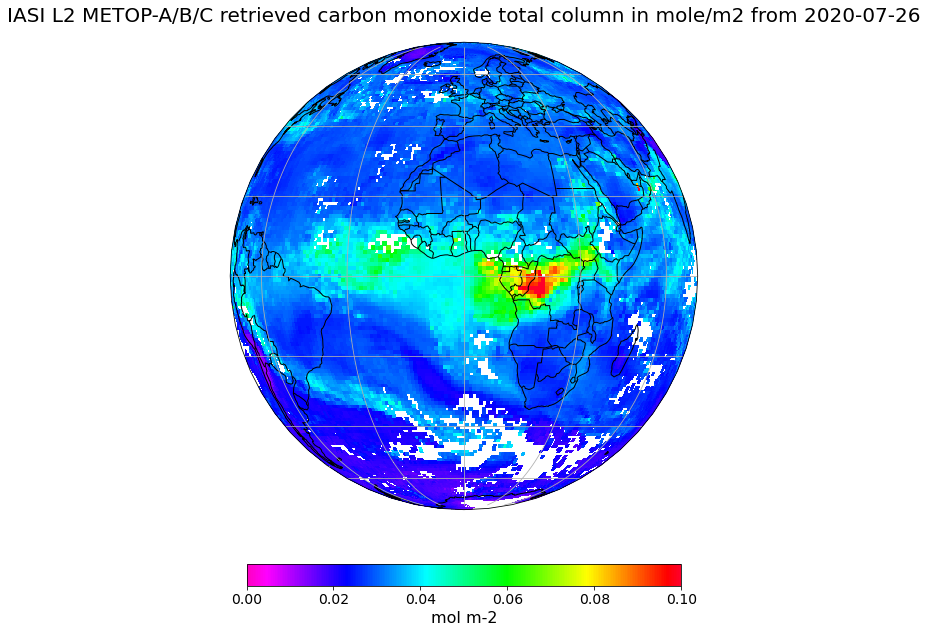

In [19]:
visualize_pcolormesh(data_array=xarray_abc, 
                     longitude=xarray_abc.longitude, 
                     latitude=xarray_abc.latitude, 
                     projection=ccrs.Orthographic(), 
                     color_scale='gist_rainbow_r', 
                     unit=xarray_abc.units, 
                     long_name= "IASI L2 METOP-A/B/C " + xarray_abc.long_name + " from " + str(xarray_abc.time.data)[0:10], 
                     vmin=0, 
                     vmax=0.1,
                     set_global=True
                    )

You can zoom into a region by specifying a `bounding box` of interest. Let's set the extent to Portugal, with: `[35.5, 44, -11, -5]`. The above plotting function [visualize_pcolormesh](./functions.ipynb#visualize_pcolormesh) allows for setting a specific bounding box. You simply have to set the `set_global` key to `False`. It is best to adjust the projection to `PlateCarree()`, as this will be more appropriate for a regional subset.

(<Figure size 1440x720 with 2 Axes>,
 <GeoAxesSubplot:title={'center':'IASI L2 METOP-A/B/C retrieved carbon monoxide total column in mole/m2 from 2020-07-26'}>)

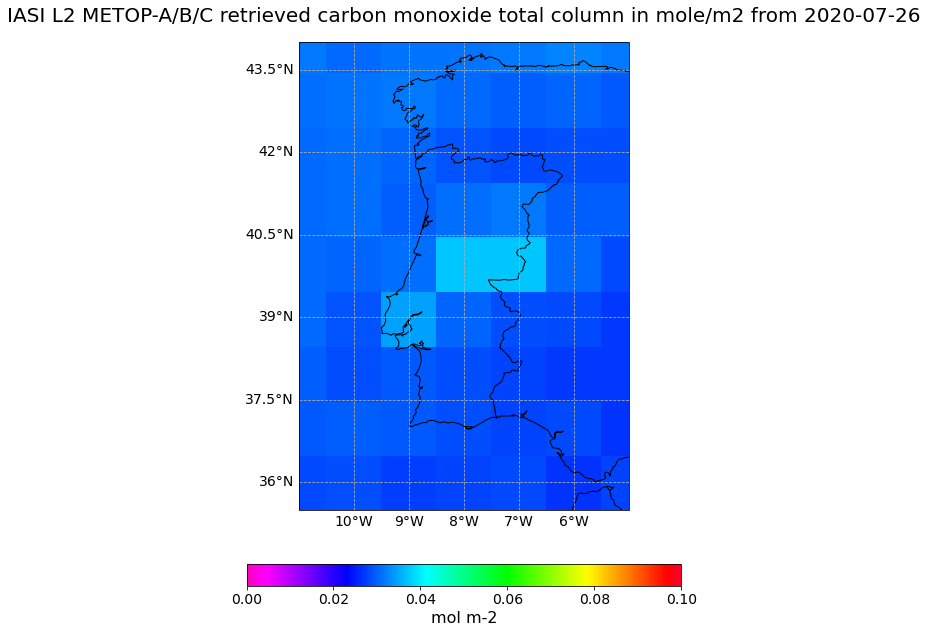

In [20]:
latmin = 35.5
latmax = 44.
lonmin = -11.
lonmax = -5

visualize_pcolormesh(data_array=xarray_abc, 
                     longitude=xarray_abc.longitude, 
                     latitude=xarray_abc.latitude, 
                     projection=ccrs.PlateCarree(), 
                     color_scale='gist_rainbow_r', 
                     unit=xarray_abc.units, 
                     long_name="IASI L2 METOP-A/B/C " + xarray_abc.long_name + " from " + str(xarray_abc.time.data)[0:10],
                     vmin=0, 
                     vmax=0.1,
                     lonmin=lonmin,
                     lonmax=lonmax,
                     latmin=latmin,
                     latmax=latmax,
                     set_global=False)

<br>

<a href="./12_AC-SAF_Metop-AB_GOME-2_AAH.ipynb"><< 12 - AC-SAF GOME-2 AAH </a> <span style="float:right;"><a href="./21_Sentinel-3_OLCI_RGB.ipynb">21 - Sentinel-3 OLCI RGB >></a></span>

<hr>

<img src='./img/copernicus_logo.png' alt='Logo EU Copernicus' align='right' width='20%'><br><br><br>

<p style="text-align:right;">This project is licensed under the <a href="./LICENSE">MIT License</a> and is developed under a Copernicus contract.